# Keras Tutorial Deep Learning in Python

https://elitedatascience.com/keras-tutorial-deep-learning-in-python
http://cs231n.github.io/convolutional-networks/#overview

https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py


In [1]:
'''Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''

'Trains a simple convnet on the MNIST dataset.\nGets to 99.25% test accuracy after 12 epochs\n(there is still a lot of margin for parameter tuning).\n16 seconds per epoch on a GRID K520 GPU.\n'

In [34]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

import matplotlib.pyplot as plt
import numpy as np

In [3]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

In [4]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [7]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [8]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [9]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [10]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 86s 1ms/step - loss: 0.2592 - acc: 0.9203 - val_loss: 0.0565 - val_acc: 0.9812
Epoch 2/12
60000/60000 [==============================] - 86s 1ms/step - loss: 0.0888 - acc: 0.9733 - val_loss: 0.0376 - val_acc: 0.9868
Epoch 3/12
60000/60000 [==============================] - 86s 1ms/step - loss: 0.0669 - acc: 0.9806 - val_loss: 0.0343 - val_acc: 0.9882
Epoch 4/12
60000/60000 [==============================] - 86s 1ms/step - loss: 0.0540 - acc: 0.9837 - val_loss: 0.0306 - val_acc: 0.9890
Epoch 5/12
60000/60000 [==============================] - 86s 1ms/step - loss: 0.0484 - acc: 0.9854 - val_loss: 0.0303 - val_acc: 0.9892
Epoch 6/12
60000/60000 [==============================] - 87s 1ms/step - loss: 0.0399 - acc: 0.9873 - val_loss: 0.0258 - val_acc: 0.9915
Epoch 7/12
60000/60000 [==============================] - 90s 1ms/step - loss: 0.0366 - acc: 0.9885 - val_loss: 0.0251 - val_acc

In [11]:
score = model.evaluate(x_test, y_test, verbose=0)

In [12]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.026848003615903553
Test accuracy: 0.9915


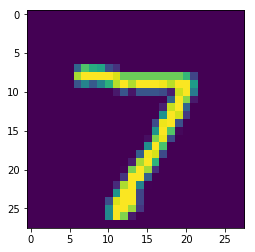

In [41]:
im = x_test[0]
im.shape
plt.imshow(im.reshape(28,28))

In [25]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [32]:
predict = model.predict(x_test[0:1])
predict

array([[8.0828313e-12, 1.4346050e-11, 2.7890798e-10, 2.5845348e-10,
        1.3141099e-14, 8.8364984e-14, 1.3389679e-18, 1.0000000e+00,
        1.6391916e-12, 2.4199059e-10]], dtype=float32)

In [35]:
np.argmax(predict)

7

In [42]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [43]:
x_train.shape

(60000, 28, 28, 1)